In [24]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

In [2]:
df = pd.read_csv("new_inspection_data_2019.csv")
df["all_comments"] = ""
df["all_violations"] = ""
df.head()

C:\Users\prins\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (69,70,71,72,73,74,75,76,77,78,79,80,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_id,inspection_type,latitude,license_,...,violation_30_comment,violation_31_type,violation_31_comment,violation_32_type,violation_32_comment,violation_33_type,violation_33_comment,violation_count,all_comments,all_violations
0,4634-4636 N KEDZIE AVE,SALAM RESTAURANT,CHICAGO,SALAM RESTAURANT,Restaurant,2019-10-25,2320519,Complaint Re-Inspection,41.965719,2002822.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,,
1,2114 W LAWRENCE AVE,TAQUERIA EL DORADO,CHICAGO,TAQUERIA EL DORADO,Restaurant,2019-10-25,2320509,License Re-Inspection,41.968820,2694960.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,,
2,2653 W OGDEN AVE,GADS HILL CHILD CARE CENTER,CHICAGO,GADS HILL CHILD CARE CENTER,Children's Services Facility,2019-10-24,2320368,License,41.862273,2215799.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,,
3,6925 S PULASKI RD,DUNKIN DONUTS/BASKIN ROBBINS,CHICAGO,DUNKIN DONUTS/BASKIN ROBBINS,Restaurant,2019-10-24,2320374,Complaint Re-Inspection,41.766871,1909364.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,,
4,5209-5215 W FULLERTON AVE,FULLERTON DOLLAR PLUS,CHICAGO,"FULLERTON DOLLAR PLUS, INC.",Grocery Store,2019-10-24,2320419,License,41.923991,2689437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,,


In [3]:
i=1
for comment in range(0, 33):
    viol_com = f"violation_{i}_comment"
    df["all_comments"]= df["all_comments"].astype(str)+" "+ df[viol_com].astype(str)
    i += 1

In [4]:
# df.all_comments[1]

In [5]:
# text = df.all_comments[2]
# wordcloud = WordCloud().generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [6]:
comments_list = df.all_comments
all_comments = comments_list.str.cat(sep = " ")

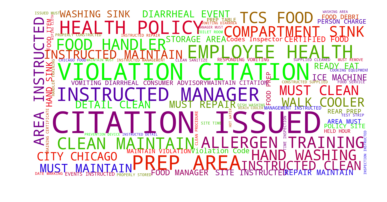

In [49]:
stopwords = set(STOPWORDS)
stopwords.update(["nan", "nan ", " nan", " nan ", "priority", "foundation", "comments", "provide", "maintained", "installed", "instructed maintain", "observed"])
all_comment_wordcloud = WordCloud(stopwords=stopwords, background_color="white", width = 800, height = 400, scale=2, min_font_size=8, max_font_size = 72, max_words=200, colormap = "brg").generate(all_comments)
plt.imshow(all_comment_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
i=1
for violation in range(0, 33):
    viol_type = f"violation_{i}_type"
    df["all_violations"]= df["all_violations"].astype(str)+" "+ df[viol_type].astype(str)
    i += 1

In [9]:
violations_list = df.all_violations
all_violations = violations_list.str.cat(sep = " ")

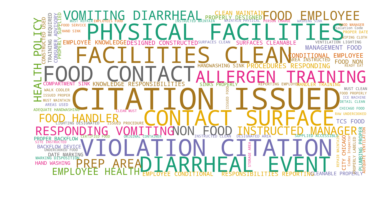

In [47]:
# stopwords = set(STOPWORDS)
# stopwords.update(["nan", "nan ", " nan", " nan "])
all_violation_wordcloud = WordCloud(stopwords=stopwords, background_color="white", width = 800, height = 400, scale=2, min_font_size=8, max_font_size = 72, max_words=200, colormap="Dark2").generate(all_violations)
plt.imshow(all_violation_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
all_comment_wordcloud.to_file("comments_wordcloud.png")
all_violation_wordcloud.to_file("violations_wordcloud.png")